In [142]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
x=[]
y=[]
bhagyax0=[]
bhagyax1=[]
with open("data1.csv","r") as csvfile:
    lines=csv.reader(csvfile)
    dataset=list(lines)
    for i in range(len(dataset)):
        temp=dataset[i][0].split(",")
        a,b=float(temp[0]),float(temp[1])
        c=int(temp[2],2)
        if(c==0):
            bhagyax0.append([a,b])
        if(c==1):
            bhagyax1.append([a,b])
        x.append([a,b])
        y.append([c])
one=np.ones([len(x),1])
print(one.shape)
x=np.concatenate((one,x),axis=1)
x=(x-np.mean(x))/np.std(x)
y=np.array(y)
bhagyax0=np.array(bhagyax0)
bhagyax1=np.array(bhagyax1)
bhagyax0=(bhagyax0-np.mean(bhagyax0))/np.std(bhagyax0)
bhagyax1=(bhagyax1-np.mean(bhagyax1))/np.std(bhagyax1)

(100, 1)


In [143]:
count=0
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=.3)
theta = np.matrix(np.zeros(3))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
bh0=[]
bh1=[]
bh2=[]
for i in range(0,len(x_train)):
    bh2.append(x_train[i][2])
    bh1.append(x_train[i][1])
    bh0.append(x_train[i][0])
bh0=np.matrix(bh0).T
bh1=np.matrix(bh1).T
bh2=np.matrix(bh2).T
print(theta.shape)

(70, 3) (30, 3) (70, 1) (30, 1)
(1, 3)


In [144]:
def sigmoid(x,theta):
    z=x*(theta.T)
    return 1.0/(1.0+np.exp(-z))

def log_likelihood(x,y,theta):
    sigmoid_probs=sigmoid(x,theta)
    return np.sum((-1)*y.T*np.log(sigmoid_probs)-(1-y).T*np.log(1-sigmoid_probs))/len(y)
                  
def gradient(x,y,theta):
    sigmoid_probs = sigmoid(x, theta)
    loss=sigmoid_probs-y
    return (loss.T*x)/len(x)


def hessian1(x,y,theta):
    l=[]
    s=sigmoid(x,theta)
    for i in range(0,s.shape[0]):
        l.append(0.25)
    D=np.diag(l)
    temp=np.dot(D,x)
    H=np.dot((x.T),temp)
    return H/len(x)

delta_l=np.Infinity
l=log_likelihood(x_train,y_train,theta)
dell=.0000000001
iters=15
i=0
cost=[]
iterations=[]
while abs(delta_l)>dell and i<iters:
    iterations.append(i)
    i+=1
    g=gradient(x_train,y_train,theta)
    g=np.squeeze(g)
    hess=hessian1(x_train,y_train,theta)
    h_inv=np.linalg.inv(hess)
    temp=np.dot(h_inv,g.T)
    
    #updating theta
    theta=theta-(temp.T)
    l_new=log_likelihood(x_train,y_train,theta)
    delta_l=l-l_new
    l=l_new
    
print("parameters for regression:",theta)

##calculating Accuracy of the test data
tempy=np.matmul(x_test,theta.transpose())
tempy=1/(1+np.exp((-1)*tempy))
tempy=np.where(tempy>=0.5,1,0)
tempy=np.squeeze(tempy)
for i in range(0,len(tempy)):
    if(tempy[i]==y_test[i]):
        count=count+1
print("correct predictions out of 30 test points is ",count)
print("Accuracy achieved=",count/len(tempy)*100,"%")

parameters for regression: [[3.82051223 4.6552503  4.76798595]]
correct predictions out of 30 test points is  26
Accuracy achieved= 86.66666666666667 %


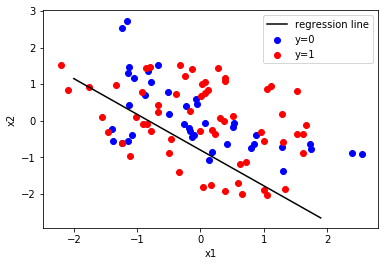

In [147]:
##Using entire dataset for plotting the graph as there are lesser test points
plt.scatter([bhagyax0[:,0]],[bhagyax0[:,1]],c='b',label='y=0')
plt.scatter([bhagyax1[:,0]],[bhagyax1[:,1]],c='r',label='y=1')

x1=np.arange(-2,2,0.1)
x2=-(theta[0,0]+theta[0,1]*x1)/theta[0,2]
plt.plot(x1,x2,c='k',label='regression line')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()